In [1]:
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import requests
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [2]:
username = "theraphael0000"
mod = "Rapid"
target = 1500

data = requests.get(f"https://lichess.org/api/user/{username}/rating-history").json()
print(data)
by_mod = next(filter(lambda d: d["name"] == mod, data))["points"]
print(by_mod)

[{'name': 'Bullet', 'points': [[2024, 3, 13, 1298], [2024, 4, 1, 1281]]}, {'name': 'Blitz', 'points': [[2023, 11, 22, 1302]]}, {'name': 'Rapid', 'points': [[2023, 9, 18, 950], [2023, 9, 19, 965], [2023, 9, 20, 979], [2023, 9, 21, 1021], [2023, 9, 22, 970], [2023, 9, 23, 976], [2023, 9, 24, 915], [2023, 9, 25, 907], [2023, 9, 26, 899], [2023, 9, 27, 913], [2023, 9, 28, 946], [2023, 9, 29, 956], [2023, 9, 30, 954], [2023, 9, 31, 992], [2023, 10, 1, 1003], [2023, 10, 3, 996], [2023, 10, 5, 1011], [2023, 10, 7, 1020], [2023, 10, 8, 1023], [2023, 10, 9, 1027], [2023, 10, 10, 1030], [2023, 10, 11, 989], [2023, 10, 12, 1004], [2023, 10, 13, 1040], [2023, 10, 14, 1069], [2023, 10, 15, 1097], [2023, 10, 16, 1109], [2023, 10, 17, 1128], [2023, 10, 18, 1173], [2023, 10, 19, 1181], [2023, 10, 20, 1199], [2023, 10, 23, 1166], [2023, 10, 24, 1154], [2023, 10, 25, 1133], [2023, 10, 26, 1110], [2023, 10, 27, 1077], [2023, 10, 28, 1055], [2023, 10, 29, 1049], [2023, 10, 30, 1048], [2023, 11, 1, 1079], 

In [3]:
X = []
Y = []

for g in by_mod:
    X.append(datetime(g[0], g[1] +1, g[2]))
    Y.append(g[-1])

def get_reg(X,Y):
    A = np.vstack([X, np.ones(len(X))]).T
    return np.linalg.lstsq(A, Y, rcond=None)[0]

2.39764667669793e-05 -39690.197797801375
[1697580000.0, 1697666400.0, 1697752800.0, 1697839200.0, 1697925600.0, 1698012000.0, 1698098400.0, 1698184800.0, 1698271200.0, 1698357600.0, 1698444000.0, 1698530400.0, 1698620400.0, 1698706800.0, 1698793200.0, 1698966000.0, 1699138800.0, 1699311600.0, 1699398000.0, 1699484400.0, 1699570800.0, 1699657200.0, 1699743600.0, 1699830000.0, 1699916400.0, 1700002800.0, 1700089200.0, 1700175600.0, 1700262000.0, 1700348400.0, 1700434800.0, 1700694000.0, 1700780400.0, 1700866800.0, 1700953200.0, 1701039600.0, 1701126000.0, 1701212400.0, 1701298800.0, 1701385200.0, 1701471600.0, 1701558000.0, 1701644400.0, 1701730800.0, 1701817200.0, 1701903600.0, 1702076400.0, 1702162800.0, 1702249200.0, 1702335600.0, 1702422000.0, 1702594800.0, 1702681200.0, 1702767600.0, 1702854000.0, 1702940400.0, 1703113200.0, 1703199600.0, 1703286000.0, 1703372400.0, 1703458800.0, 1703545200.0, 1703631600.0, 1703718000.0, 1703804400.0, 1703890800.0, 1703977200.0, 1704063600.0, 170415

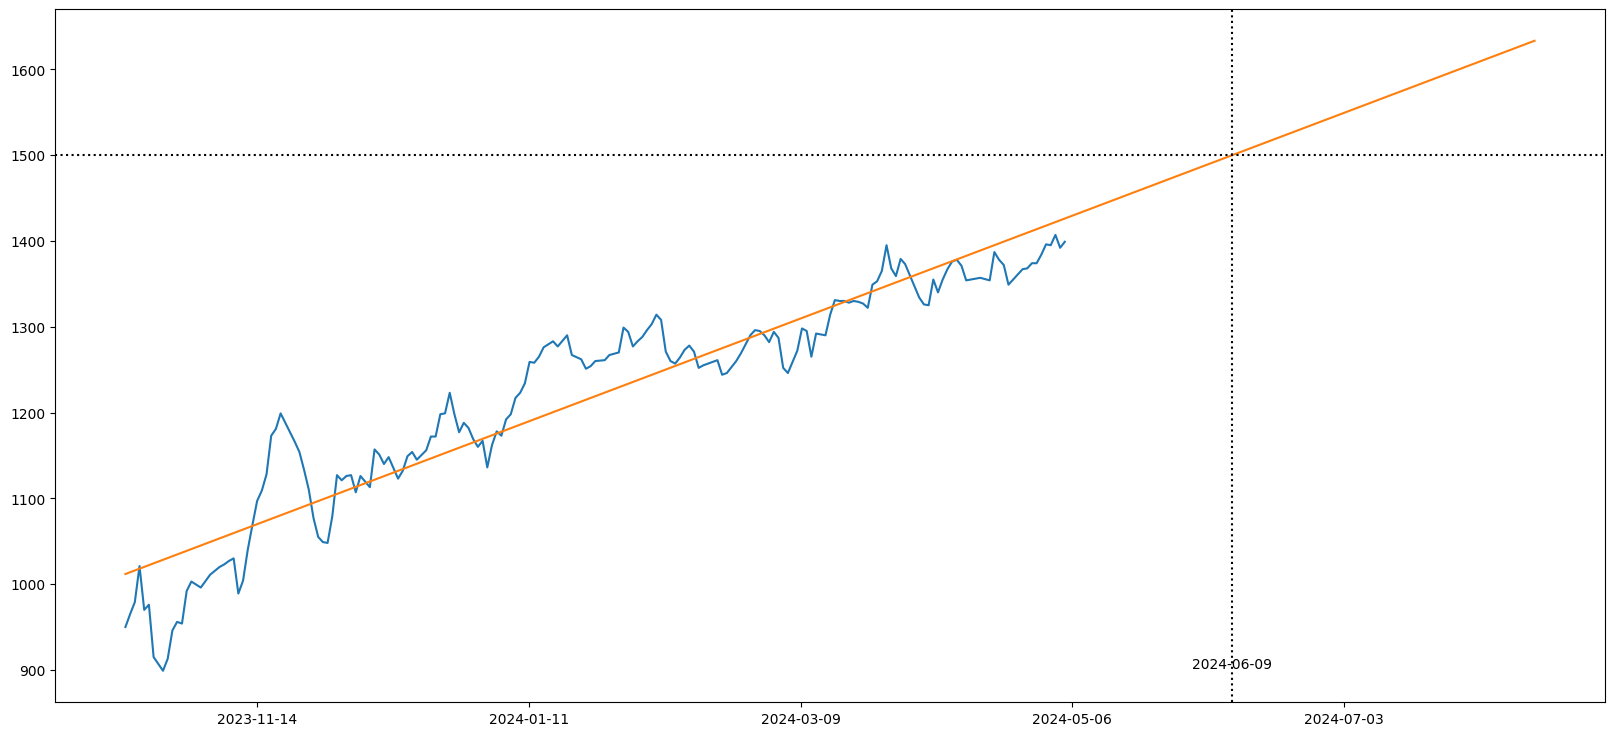

In [4]:
Xt = [xi.timestamp() for xi in X]
m, c = get_reg(Xt,Y)
print(m, c)
Xl = [min(Xt), max(Xt) + (max(Xt) - min(Xt)) / 2]
Yl = [m*xi + c for xi in Xl]

print(Xt)
print(Y)
print(Xl)
print(Yl)

fig = plt.figure(figsize=(20,9))
plt.plot(Xt,Y)
plt.plot(Xl,Yl)

def format_(l, i=None):
    return str(datetime.fromtimestamp(l).date())

xaxis = fig.axes[0].get_xaxis()
xaxis.set_major_formatter(format_)

py = target
px = (py - c) / m
print(px, py)


plt.axvline(x=px, color='k', linestyle='dotted')
plt.axhline(y=py, color='k', linestyle='dotted')

plt.text(px, min(Y), f'{format_(px)}', color='k', ha='center', va='bottom')

plt.show()